# DIALOGUE analysis

We continue with the BS solver output.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pertpy as pt
import scanpy as sc
import anndata as ad

In [3]:
import pickle as pkl
with open("dialogue_lp.pkl", "rb") as file:
    dlg_lp_results = pkl.load(file)

In [4]:
adata = ad.read_h5ad("dialogue_lp.h5ad")

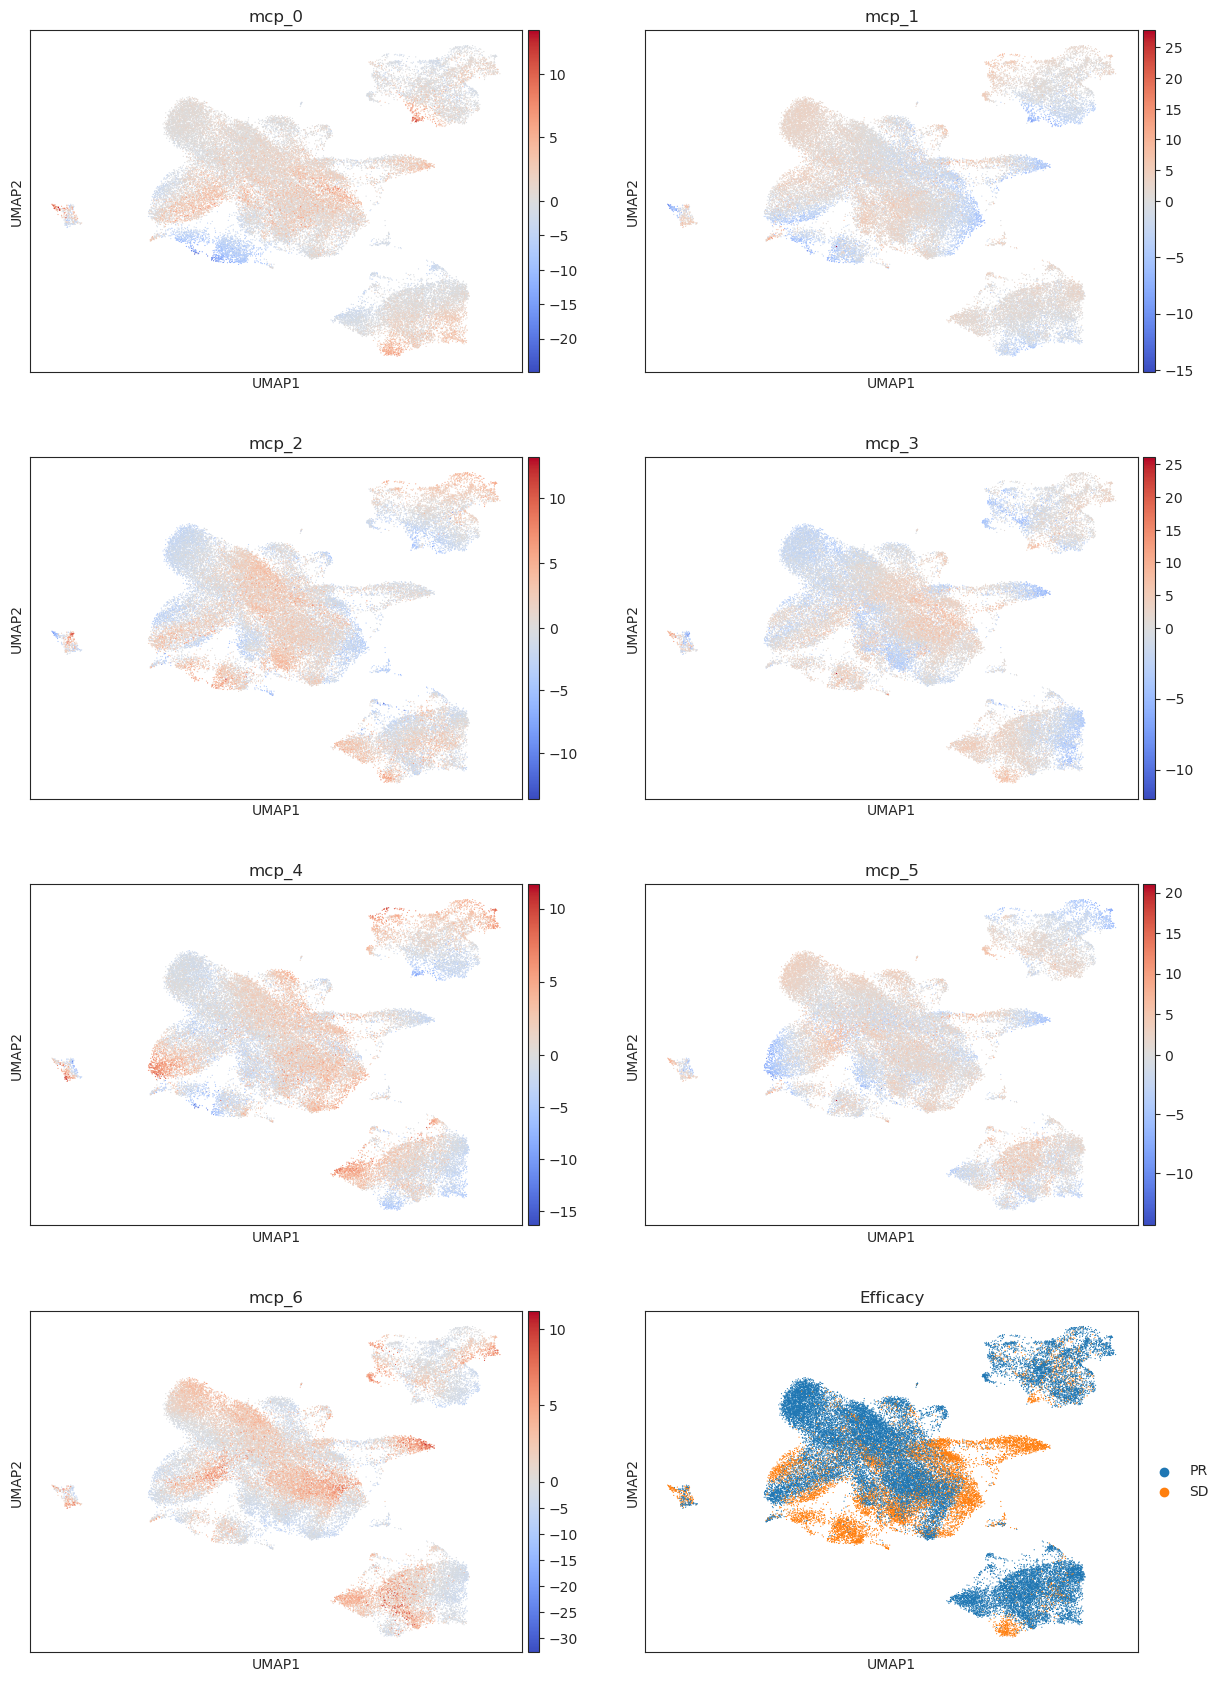

In [5]:
sc.pl.umap(adata, color=["mcp_0", "mcp_1", "mcp_2","mcp_3","mcp_4","mcp_5","mcp_6","Efficacy"], ncols=2, cmap='coolwarm', vcenter=0)

In [6]:
pvals_adj = dlg_lp_results["pvals_adj"]
pvals_adj

,mcp_0,mcp_1,mcp_2,mcp_3,mcp_4,mcp_5,mcp_6,mcp_7,mcp_8,mcp_9
t_Bmem-CD27,0.812505,0.070593,0.943745,0.852531,0.263386,0.950101,0.599670,0.906707,0.938188,0.750636
t_CD4_Tcm-LMNA,0.676368,0.070593,0.943745,0.684517,0.471981,0.950101,0.585246,0.655553,0.938188,0.137093
t_CD4_Treg-FOXP3,0.676368,0.070593,0.943745,0.733677,0.451241,0.950101,0.585246,0.906707,0.938188,0.352068
t_CD8_MAIT-KLRB1,0.676368,0.095617,0.943745,0.684517,0.451241,0.950101,0.815356,0.906707,0.938188,0.750636
t_CD8_Tem-GZMK,0.676368,0.070593,0.943745,0.706046,0.623095,0.950101,0.782453,0.655553,0.938188,0.750636
t_CD8_Trm-ZNF683,0.676368,0.112273,0.943745,0.684517,0.799628,0.950101,0.585246,0.655553,0.938188,0.273377
t_Tn-LEF1,0.676368,0.070593,0.943745,0.684517,0.451241,0.950101,0.434785,0.655553,0.938188,0.137093
t_mono-FCN1,0.812505,0.070593,0.943745,0.684517,0.799628,0.950101,0.631975,0.906707,0.938188,0.273377
t_pB-IGHG1,0.812505,0.070593,0.943745,0.733677,0.263386,0.950101,0.599670,0.741117,0.938188,0.750636


We are interested in mcp 1

In [7]:
ct_subs = dlg_lp_results["ct_subs"]

In [8]:
dl = pt.tl.Dialogue(sample_id = "Sample",
                       celltype_key = "Cluster",
                       n_counts_key = "n_counts",
                       n_mpcs = 10)

<Axes: xlabel='Cluster', ylabel='mcp_1'>

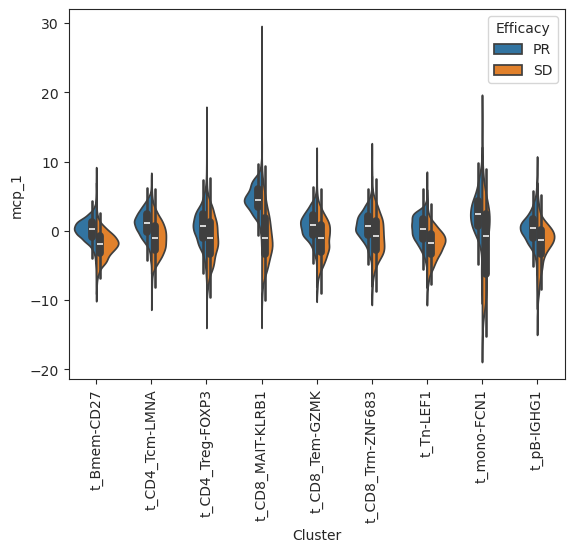

In [9]:
dl.plot_split_violins(adata, split_key="Efficacy", celltype_key="Cluster", mcp="mcp_1")

In [10]:
mini = adata[adata.obs["Cluster"].isin(dlg_lp_results['pvals'][dlg_lp_results['pvals_adj']['mcp_1']==dlg_lp_results['pvals_adj']['mcp_1'].min()].index.values)].copy()

In [17]:
mini.obs = mini.obs.replace({"SD":"Stable disease", "PR":"Partial response"})
mini.obs = mini.obs.replace({"t_CD4_Tcm-LMNA":"CD4 Tcm cells",
                             "t_pB-IGHG1":"Plasma B cells",
                             "t_Bmem-CD27":"Memory B cells",
                            "t_CD8_MAIT-KLRB1" : "CD8 MAIT cells",
                            "t_Tn-LEF1":"Naive T cells",
                            "t_CD4_Treg-FOXP3": "CD4 regulatory T cells",
                            "t_CD8_Tem-GZMK": "CD8 effector memory T cells",
                            "t_mono-FCN1": "Intermediate  monocytes"
                            })

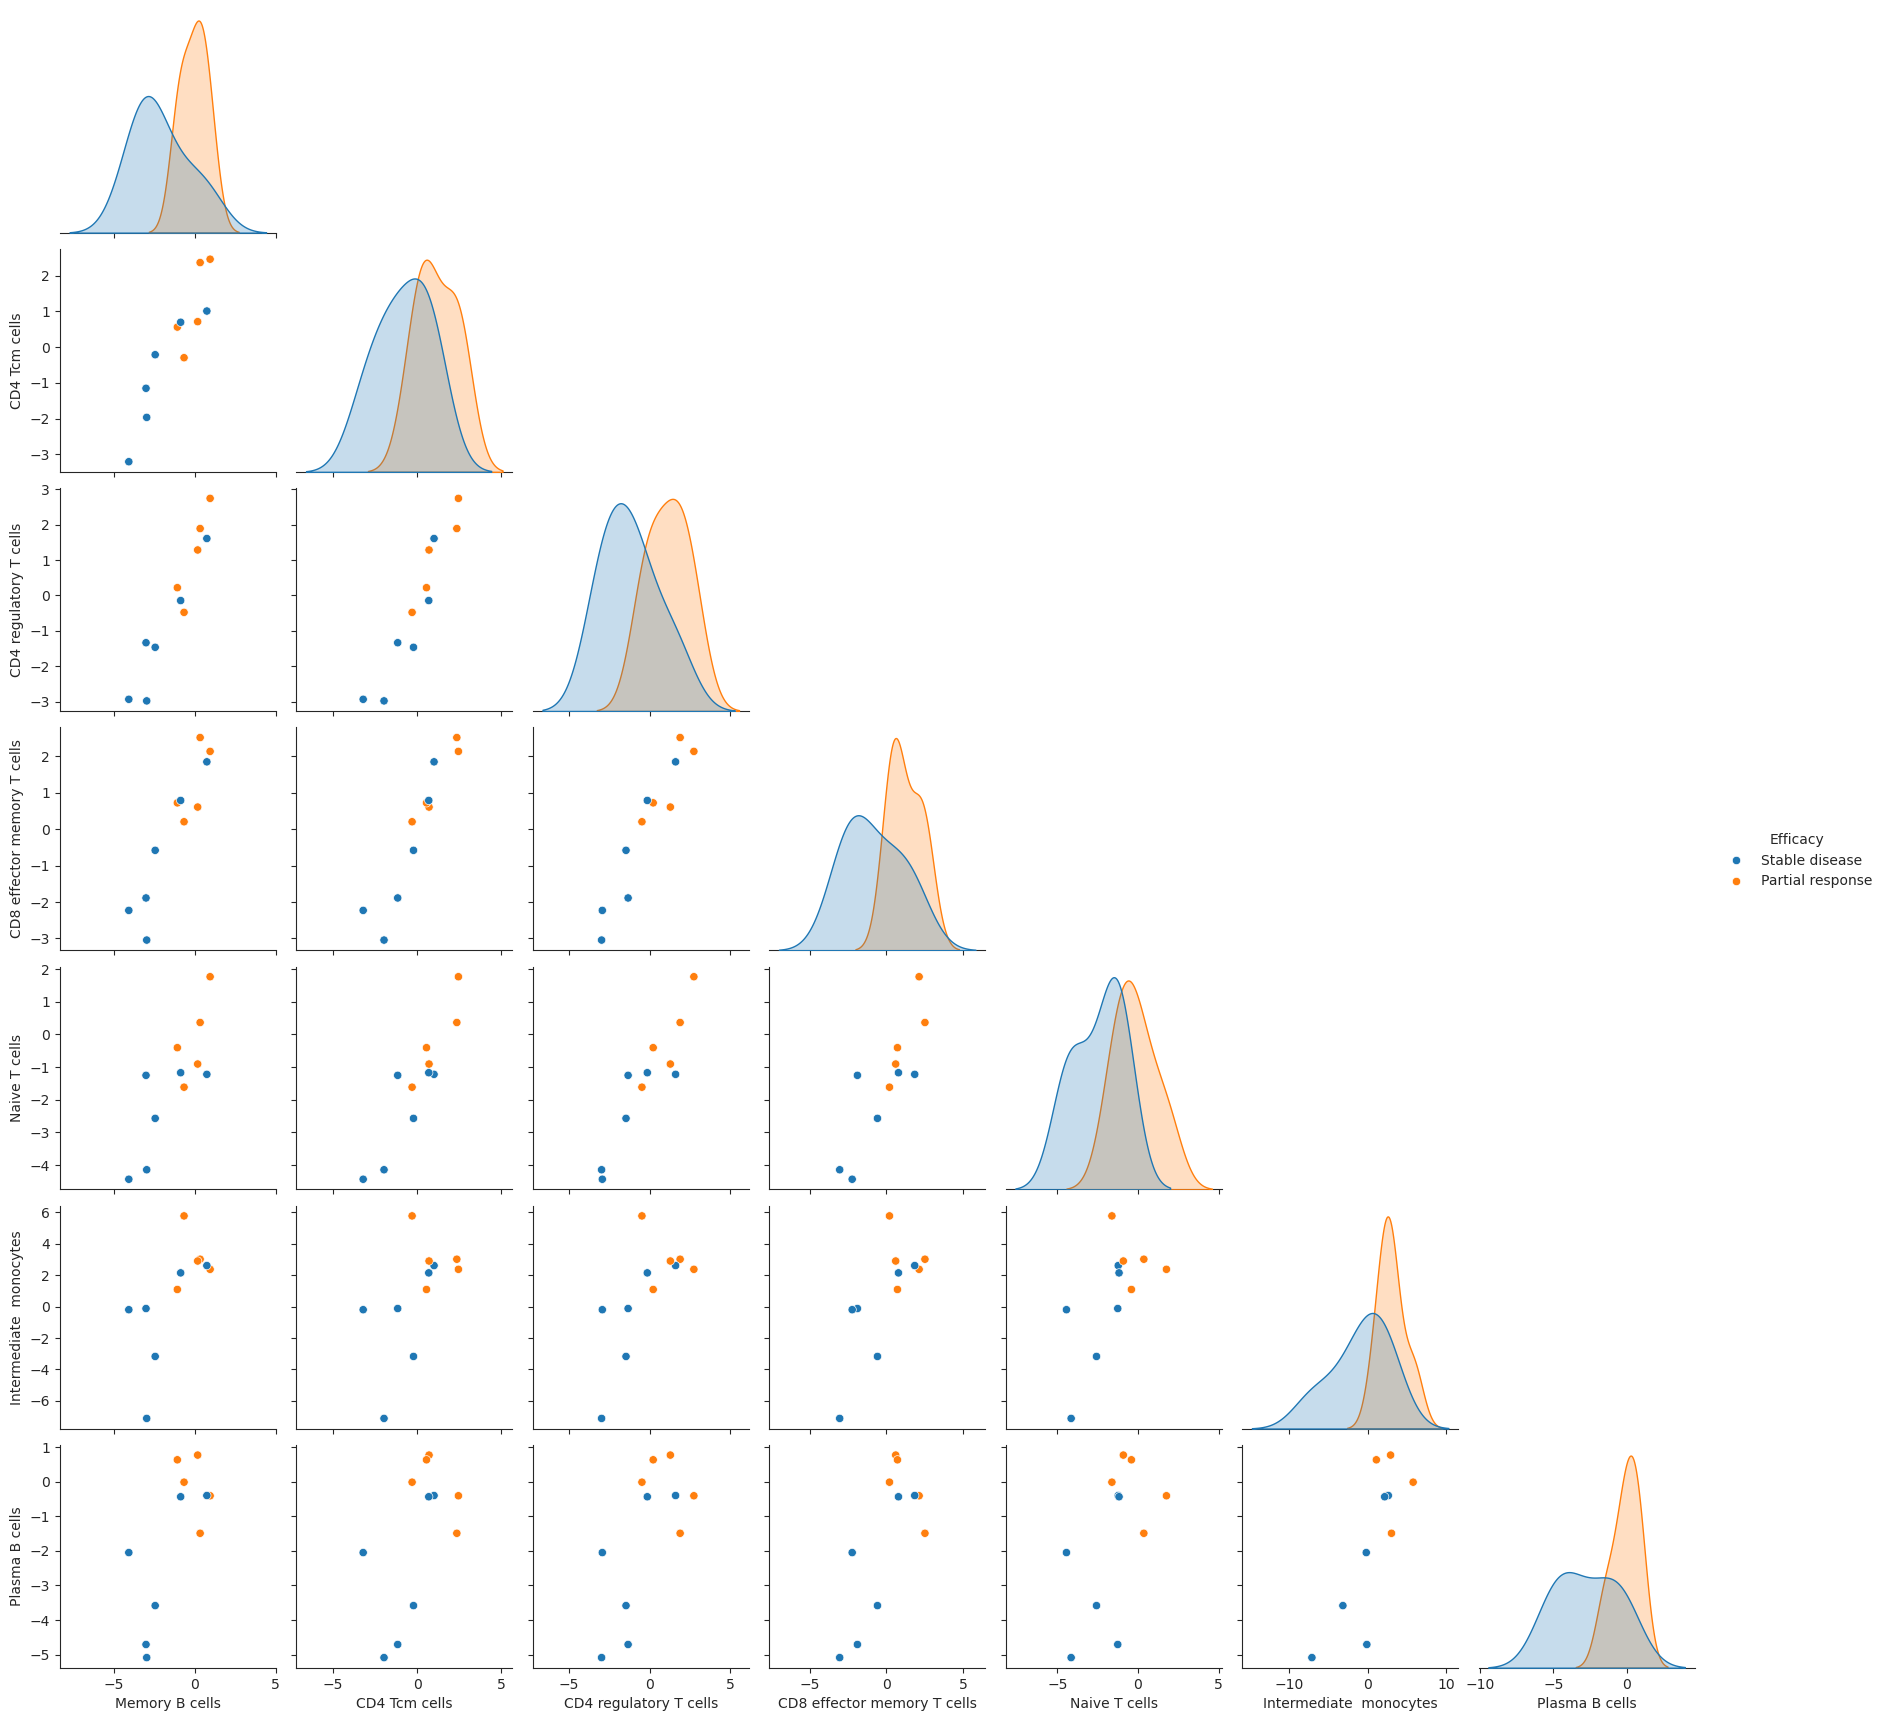

In [18]:
dl.plot_pairplot(
    mini,
    celltype_key="Cluster",
    color="Efficacy",
    mcp="mcp_1",
    sample_id="Sample",
)

In [13]:
extrema_genes = dl.get_extrema_MCP_genes(ct_subs)

In [26]:
mapping = {
    "t_CD4_Tcm-LMNA": "CD4 Tcm cells",
    "t_pB-IGHG1": "Plasma B cells",
    "t_Bmem-CD27": "Memory B cells",
    "t_CD8_MAIT-KLRB1": "CD8 MAIT cells",
    "t_Tn-LEF1": "Naive T cells",
    "t_CD4_Treg-FOXP3": "CD4 regulatory T cells",
    "t_CD8_Tem-GZMK": "CD8 effector memory T cells",
    "t_mono-FCN1": "Intermediate monocytes"
}


renamed_extrema_genes_mcp_1 = {mapping[k]: v for k, v in extrema_genes["mcp_1"].items() if k in mapping}

In [27]:
renamed_extrema_genes_mcp_1["Memory B cells"]

,names,scores,logfoldchanges,pvals,pvals_adj
0,IFITM1,21.488491,2.530003,2.607744e-88,7.230530e-85
1,ISG20,18.877321,2.359887,2.804660e-70,3.402228e-67
2,ISG15,17.600342,2.925260,7.201904e-61,4.992205e-58
3,RPL28,15.307499,0.711827,3.696255e-49,1.749771e-46
4,MX1,15.110206,2.309578,4.101194e-47,1.768890e-44
...,...,...,...,...,...
19404,JUN,-23.479864,-2.872911,1.233192e-103,4.787006e-100
19405,PPP1R15A,-23.993483,-2.703451,2.229943e-107,1.442699e-103
19406,RSRP1,-24.097584,-2.886577,5.050550e-107,2.450653e-103
19407,DDX5,-25.401907,-2.344047,1.623785e-116,1.575803e-112


In [38]:
renamed_extrema_genes_mcp_1["Memory B cells"].to_csv("LP_memory_b_cells.csv")

In [28]:
renamed_extrema_genes_mcp_1["Plasma B cells"]

,names,scores,logfoldchanges,pvals,pvals_adj
0,IGKV1-39,29.361467,8.985486,4.332974e-115,8.409869e-111
1,IGKV1D-39,26.950096,7.854477,6.548024e-102,6.354530e-98
2,CD79A,17.449245,2.150314,2.964045e-59,8.218451e-56
3,IGKV1D-12,17.303410,7.463571,5.694691e-53,1.004802e-49
4,B2M,17.123459,1.381225,1.429246e-55,2.774024e-52
...,...,...,...,...,...
19404,NEAT1,-17.679457,-2.566001,5.035785e-59,1.221744e-55
19405,JUN,-18.031147,-2.701756,6.240453e-63,3.028024e-59
19406,MALAT1,-18.059683,-2.493598,1.199017e-62,4.654346e-59
19407,IGLC3,-19.020327,-8.208364,4.990918e-61,1.614479e-57


In [39]:
renamed_extrema_genes_mcp_1["Plasma B cells"].to_csv("LP_plasma_b_cells.csv")

In [29]:
renamed_extrema_genes_mcp_1["CD4 Tcm cells"]

,names,scores,logfoldchanges,pvals,pvals_adj
0,RPL32,22.912500,1.461168,5.405747e-86,5.246008e-82
1,RPL34,21.540291,1.424091,2.849012e-78,9.216080e-75
2,RPS12,20.694366,1.114542,1.029197e-72,2.496962e-69
3,RPS8,20.396162,1.265463,5.325440e-73,1.476592e-69
4,RPL11,19.936697,1.240908,4.498804e-70,8.731728e-67
...,...,...,...,...,...
19404,HSP90AA1,-19.944847,-2.243256,3.956300e-70,8.531980e-67
19405,HSPH1,-21.668129,-3.241071,1.151330e-80,4.469233e-77
19406,DNAJB1,-22.236036,-3.169123,1.299713e-83,6.306533e-80
19407,HSPA1A,-22.722366,-4.381826,2.300250e-85,1.488185e-81


In [40]:
renamed_extrema_genes_mcp_1["CD4 Tcm cells"].to_csv("LP_cd4_tcm_cells.csv")

In [30]:
renamed_extrema_genes_mcp_1["CD4 regulatory T cells"]

,names,scores,logfoldchanges,pvals,pvals_adj
0,RPL11,16.272764,1.215097,2.493342e-51,6.913325e-48
1,RPL32,16.026089,1.265940,6.813187e-50,1.652964e-46
2,RPL28,15.744047,1.191078,2.002915e-48,3.887459e-45
3,RPL41,15.086208,1.540455,1.677653e-45,2.960143e-42
4,RPS15A,14.750610,1.156690,1.676690e-43,2.324492e-40
...,...,...,...,...,...
19404,PHLDA1,-17.206692,-2.988264,6.543863e-56,2.540197e-52
19405,TNFRSF18,-17.415880,-2.685912,6.534438e-58,3.170673e-54
19406,LAYN,-18.250862,-3.548478,4.911387e-60,3.177504e-56
19407,CTLA4,-18.273514,-2.571501,9.043740e-63,8.776497e-59


In [47]:
renamed_extrema_genes_mcp_1["CD4 regulatory T cells"].to_csv("LP_cd4_regulatory_t_cells.csv")

In [31]:
renamed_extrema_genes_mcp_1["CD8 effector memory T cells"]

,names,scores,logfoldchanges,pvals,pvals_adj
0,FAM177A1,21.403481,3.043669,6.531951e-85,9.752203e-82
1,RPL11,20.730648,1.038909,1.441230e-82,1.864855e-79
2,RPL12,20.358702,1.329731,1.427699e-79,1.731888e-76
3,CREM,20.032574,2.582271,4.721773e-78,5.390876e-75
4,RPL32,19.484560,1.118183,6.778190e-74,6.924100e-71
...,...,...,...,...,...
19404,DUSP1,-24.886854,-2.982210,2.483146e-112,9.639074e-109
19405,MALAT1,-27.983749,-1.715026,1.959898e-131,9.509913e-128
19406,HSPA1B,-28.278709,-3.746665,9.419573e-138,6.094150e-134
19407,FOS,-35.714954,-4.796607,3.198944e-191,3.104415e-187


In [46]:
renamed_extrema_genes_mcp_1["CD8 effector memory T cells"].to_csv("LP_cd8_effector_memory_t_cells.csv")

In [32]:
renamed_extrema_genes_mcp_1["Naive T cells"]

,names,scores,logfoldchanges,pvals,pvals_adj
0,RPL36A,47.982044,3.559612,0.000000e+00,0.000000e+00
1,RPS3A,44.296490,1.906768,1.174551e-279,2.532985e-276
2,RPL39,44.082855,1.840453,5.883709e-284,1.427461e-280
3,RPL34,43.647404,1.701031,1.829199e-276,3.550293e-273
4,RPS8,42.187786,1.585634,2.184121e-263,3.853782e-260
...,...,...,...,...,...
19404,HSP90AA1,-45.089867,-3.579221,8.858498e-319,4.298365e-315
19405,HSPA1A,-47.470009,-7.209938,1.015742e-285,3.285757e-282
19406,DUSP1,-48.882328,-5.430118,8.605043e-319,4.298365e-315
19407,HSPA1B,-49.839455,-7.793880,1.189731e-298,4.618299e-295


In [45]:
renamed_extrema_genes_mcp_1["Naive T cells"].to_csv("LP_naive_t_cells.csv")

In [33]:
renamed_extrema_genes_mcp_1["Intermediate monocytes"]

,names,scores,logfoldchanges,pvals,pvals_adj
0,FCN1,8.492185,3.597181,5.559542e-12,3.596838e-08
1,WARS,8.314095,3.954143,2.441823e-11,9.478669e-08
2,HLA-C,8.162148,2.096594,2.417494e-11,9.478669e-08
3,PSMB9,7.953322,3.129356,5.649205e-11,1.566363e-07
4,LY6E,7.691703,4.126994,3.638287e-10,7.070214e-07
...,...,...,...,...,...
19404,PLXDC2,-7.890335,-2.484560,5.038813e-11,1.566363e-07
19405,SLCO2B1,-7.967829,-4.912519,1.794867e-09,2.322438e-06
19406,MTRNR2L12,-8.190775,-5.867849,1.444462e-09,2.002540e-06
19407,CXCL2,-8.934913,-3.824471,1.014134e-12,1.968332e-08


In [44]:
renamed_extrema_genes_mcp_1["Intermediate monocytes"].to_csv("LP_intermediate_monocytes.csv")